**Glória Maria Deitos Gomes da Silva ~ 22.Junho.2025**

#### Atividade Somativa 1 - Análise Dataset: NASA airfoil self-noise (Pressão Sonora em Aerofólios da NASA)

**Disciplina:** Técnicas de Machine Learning <br>
**Curso:** Análise e Desenvolvimento de Sistemas <br>
**Instituição:** Pontifícia Universidade Católica do Paraná (PUCPR) - Brasil  

---

## ⭐🌙 1. Introdução

Este trabalho aplica técnicas de **Machine Learning** para análise preditiva do dataset *NASA Airfoil Self-Noise*, que contém medições experimentais de ruído aerodinâmico em perfis de asa. O objetivo principal é desenvolver um modelo de **regressão supervisionada** capaz de prever com precisão os níveis de pressão sonora (em decibéis) com base em parâmetros aerodinâmicos críticos:

- **Variáveis preditoras**:  
  ✓ Frequência (`frequency`)  
  ✓ Ângulo de ataque (`attack-angle`)  
  ✓ Comprimento da corda (`chord-length`)  
  ✓ Velocidade do fluxo livre (`free-stream-velocity`)  
  ✓ Espessura da camada limite (`suction-side-displacement-thickness`)    

- **Variável alvo**:  
  `scaled-sound-pressure` (pressão sonora escalonada)

<br>

### Metodologia
1. **Pré-processamento**:
   - Normalização com `StandardScaler`
   - Redução de dimensionalidade com `PCA`

2. **Modelagem**:
   - Algoritmo: `RandomForestRegressor`
   - Validação: 75%/25% (treino/teste)

3. **Avaliação**:
   - Métricas: Coeficiente R² e MSE
   - Análise de importância de features

<br>

### Relevância e Contexto Acadêmico
Este trabalho utiliza dados didáticos fornecidos pelo professor e tem como foco a aplicação de técnicas de **Machine Learning**. Os resultados obtidos podem contribuir para o desenvolvimento de aerofólios mais silenciosos, com potencial de aplicação nas áreas de aeronáutica e engenharia.

---

## 📥 2. Carregamento dos Dados

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nasa.csv', delimiter=';')
df.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


---

## 📊 3. Análise Exploratória

<br>

### 3.1 Estatísticas Descritivas

In [11]:
df.describe()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


<br>

### 3.2 Visualização dos Dados | Histogramas

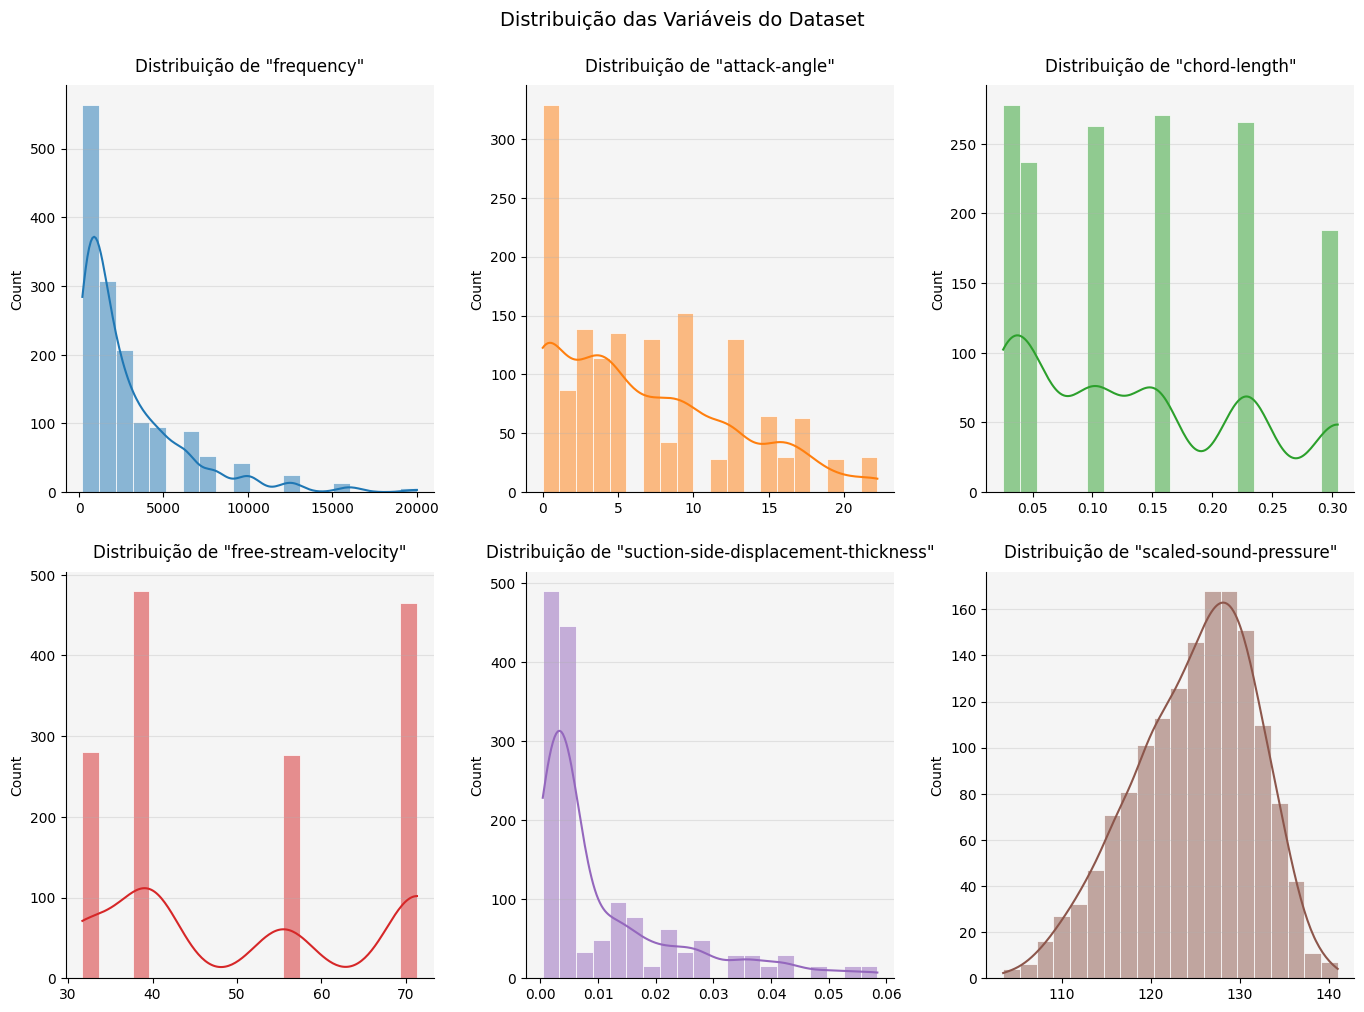

In [12]:
# Histogramas
plt.figure(figsize=(14, 10))

# Estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
n_features = len(df.columns)

for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], 
                 bins=20, 
                 color=colors[i % len(colors)],
                 kde=True,
                 edgecolor='white',
                 linewidth=0.5)
    
    # Ajustes visuais
    plt.title(f'Distribuição de "{col}"', fontsize=12, pad=10)
    plt.xlabel('')
    plt.grid(axis='y', alpha=0.3)
    plt.gca().set_facecolor('#f5f5f5')
    
    # Remove spines
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

plt.tight_layout(pad=2)
plt.suptitle('Distribuição das Variáveis do Dataset', y=1.02, fontsize=14)
plt.show()

<br>

### 3.3 Matriz de Correlação

#### Como Interpretar Esta Matriz:

#### 1. O que é correlação?
   Mede como uma variável se move em relação à outra, variando de **-1 a 1**.

#### 2. O que mostra?
- **Vermelho (+1 a +0.7)**: Quando uma variável aumenta, a outra também aumenta
- **Azul (-1 a -0.7)**: Quando uma variável aumenta, a outra diminui
- **Branco (~0)**: Pouca ou nenhuma relação

#### 3. Como usar?
1. Identifique sua variável alvo (ex: `scaled-sound-pressure`)
2. Procure células com:
   - Cores fortes (vermelho/azul intenso)
   - Borda tracejada (|r| ≥ 0.7) - indicam relações estatisticamente significativas
3. Ignore valores próximos de zero

#### Por que são relevantes?
As correlações fortes (com borda tracejada) ajudam a:
- Identificar as melhores variáveis para prever seu alvo
- Evitar usar variáveis irrelevantes no modelo
- Entender quais fatores influenciam mais o resultado

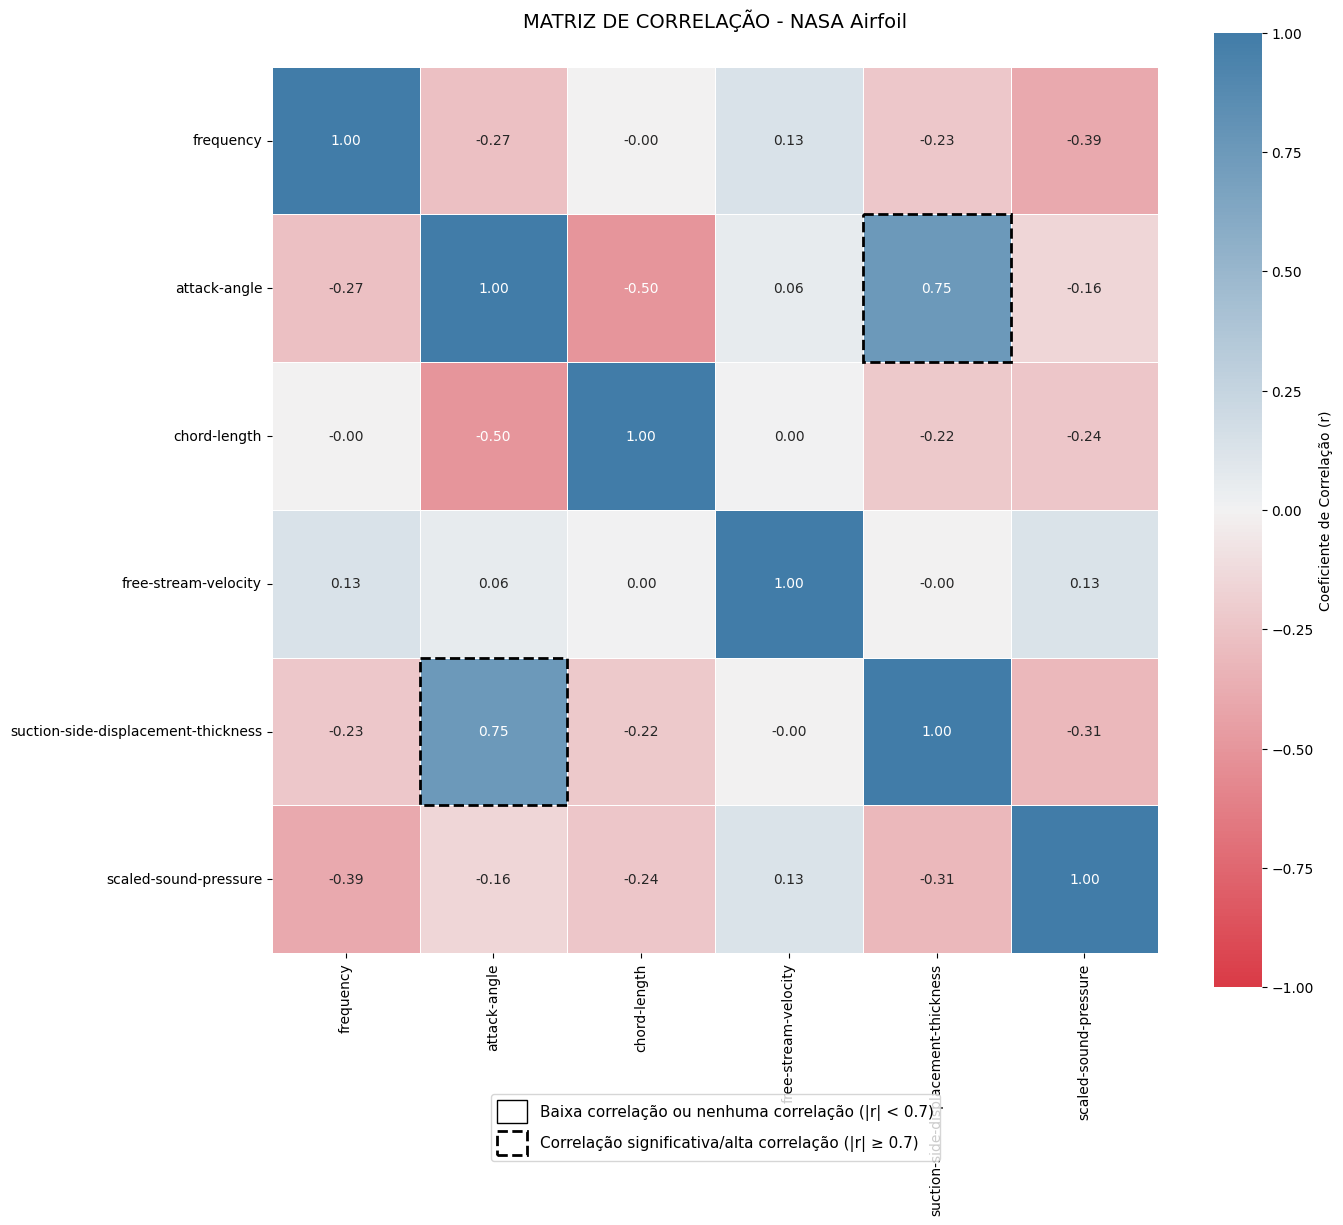

In [13]:
# Matriz de Correlação
plt.figure(figsize=(14, 13))
corr = df.corr()

# Paleta de cores
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# Plot
sns.heatmap(corr, 
           annot=True, 
           fmt=".2f", 
           cmap=cmap,
           center=0,
           vmin=-1, 
           vmax=1,
           linewidths=0.5,
           cbar_kws={'label': 'Coeficiente de Correlação (r)', 
                    'location': 'right'},
           square=True)

# Borda tracejada
for i in range(len(corr)):
    for j in range(len(corr)):
        if abs(corr.iloc[i, j]) >= 0.7 and i != j:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, 
                                           fill=False, 
                                           edgecolor='black',
                                           linewidth=2,
                                           linestyle='--'))

# Título
plt.title('MATRIZ DE CORRELAÇÃO - NASA Airfoil\n', fontsize=14, pad=12)

# Legenda
legend_elements = [
    # Correlação baixa
    plt.Rectangle((0,0), 1, 1, fc='none', ec='black', linestyle='-', linewidth=1,
              label='Baixa correlação ou nenhuma correlação (|r| < 0.7)'),
    # Correlação significativa/alta (borda tracejada)
    plt.Rectangle((0,0), 1, 1, fc='none', ec='black', linestyle='--', linewidth=2,
                 label='Correlação significativa/alta correlação (|r| ≥ 0.7)'),
]

# Posicionamento da legenda
legend = plt.legend(handles=legend_elements, 
                   loc='upper center',
                   bbox_to_anchor=(0.5, -0.15),
                   ncol=1,
                   frameon=True,
                   fontsize=11,
                   handlelength=2,
                   handleheight=2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

---

## 📄 4 Definição Explícita do Problema

### Problema:
**Prever a pressão sonora (em decibéis) de aerofólios** com base em medições aerodinâmicas obtidas em túnel de vento.

### Motivo:
O dataset contém:
- 5 variáveis de entrada (frequência, ângulo de ataque, etc.)
- 1 variável de saída contínua (`scaled-sound-pressure`)
- Relação física comprovada entre as variáveis e o ruído gerado

### Solução Proposta:
1. **Tipo de Problema**: Regressão supervisionada
   - Justificativa: A saída é um valor numérico contínuo (dB)

2. **Abordagem**:
   - Pré-processamento: Normalização (StandardScaler) + PCA
   - Modelagem: RandomForestRegressor
   - Avaliação: Métricas R² e MSE na base de teste (25% dos dados)

3. **Objetivo Final**:
   - Obter um modelo com R² > 0.85 e erro médio < 5dB
   - Identificar quais variáveis aerodinâmicas impactam mais no ruído

---

## ⚙️ 5. Pré-processamento

<br>

### 5.1 Tratamento de Dados Faltantes

**Objetivo**: Verificar se há dados ausentes que precisam ser corrigidos.  

In [14]:
# 5.1 Tratamento de Dados Faltantes
print("Valores nulos por coluna:")
df.isnull().sum()

Valores nulos por coluna:


frequency                              0
attack-angle                           0
chord-length                           0
free-stream-velocity                   0
suction-side-displacement-thickness    0
scaled-sound-pressure                  0
dtype: int64

**Resultado**:  
- `0` em todas as colunas = **Nenhum dado faltante** no dataset  
- Os dados estão completos e prontos para a próxima etapa  

<br>

### 5.2 Divisão dos Dados

**Divisão estratificada dos dados** (antes da preparação):
- **75% treino** (X_train, y_train)
- **25% teste** (X_test, y_test)

In [15]:
# 5.2 Definindo variáveis preditoras (X) e target (y)
X = df.drop('scaled-sound-pressure', axis=1)
y = df['scaled-sound-pressure']

# 5.3 Divisão dos Dados (ANTES da preparação)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(f"Dados de treino: {X_train.shape[0]} amostras")
print(f"Dados de teste: {X_test.shape[0]} amostras")

# 5.4 Normalização e PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95)  # add pca
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\nAnálise Componentes PCA:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"Componente {i}: {var*100:.1f}% da variância")
print(f"Total de variância: {sum(pca.explained_variance_ratio_)*100:.0f}%")

Dados de treino: 1127 amostras
Dados de teste: 376 amostras

Análise Componentes PCA:
Componente 1: 42.5% da variância
Componente 2: 22.1% da variância
Componente 3: 18.4% da variância
Componente 4: 13.6% da variância
Total de variância: 97%

Análise Componentes PCA:
Componente 1: 42.5% da variância
Componente 2: 22.1% da variância
Componente 3: 18.4% da variância
Componente 4: 13.6% da variância
Total de variância: 97%


<br>

### 5.4 Aplicação da Preparação dos Dados (após divisão)

**Importante**: A normalização e PCA são aplicadas primeiro nos dados de treino, depois transformam os dados de teste usando os mesmos parâmetros.

In [16]:
# 5.4 Normalização e PCA (aplicados APÓS divisão)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalização: fit no treino, transform em ambos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit + transform no treino
X_test_scaled = scaler.transform(X_test)        # Só transform no teste

# PCA: fit no treino, transform em ambos  
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit + transform no treino
X_test_pca = pca.transform(X_test_scaled)        # Só transform no teste

print("\nAnálise Componentes PCA:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"Componente {i}: {var*100:.1f}% da variância")
print(f"Total de variância: {sum(pca.explained_variance_ratio_)*100:.0f}%")
print(f"\nForma final dos dados:")
print(f"X_train_pca: {X_train_pca.shape}")
print(f"X_test_pca: {X_test_pca.shape}")


Análise Componentes PCA:
Componente 1: 42.5% da variância
Componente 2: 22.1% da variância
Componente 3: 18.4% da variância
Componente 4: 13.6% da variância
Total de variância: 97%

Forma final dos dados:
X_train_pca: (1127, 4)
X_test_pca: (376, 4)


---

## 🔄️ 6. Modelagem

<br>

### 6.1 Dados Preparados para Treinamento
Os dados já foram divididos e preparados:
- **75% treino** (X_train_pca, y_train) - normalizados e com PCA
- **25% teste** (X_test_pca, y_test) - transformados com os mesmos parâmetros

In [17]:
# 6.2 Treinamento do Modelo (Random Forest)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)  # Usando dados pré-processados

print("✅ Modelo treinado com sucesso!")

✅ Modelo treinado com sucesso!


---

## 📈 7. Avaliação do Modelo

In [18]:
# 7.1 Métricas de Desempenho
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_pca)  # Predição usando dados de teste pré-processados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"\n✅ Avaliação concluída nos {len(y_test)} amostras de teste")

MSE: 5.18
R²: 0.89

✅ Avaliação concluída nos 376 amostras de teste


<br>

## Interpretação do Gráfico e Métricas

**O que estou vendo?**  
Este gráfico compara as previsões do modelo (eixo Y) com os valores reais medidos em laboratório (eixo X) para os 25% dos dados separados para teste.

**Como interpretar este gráfico:**
- Cada ponto representa uma amostra dos 25% de teste
- **Cor do ponto:** Intensidade do erro (azul = pequeno erro, vermelho = grande erro).
- **Linha tracejada:** Representa a "previsão perfeita" (onde o modelo acertaria exatamente o valor real). Pontos próximos a essa linha indicam boas previsões.
- **R² (Coeficiente de Determinação):** Quão próximo os pontos estão da linha ideal (1.0 = perfeito). Varia de 0% (péssimo) a 100% (perfeito)
- **MSE (Erro Quadrático Médio):** Média dos quadrados dos erros (diferença entre real e predito). Quanto menor, melhor (zero = perfeito).

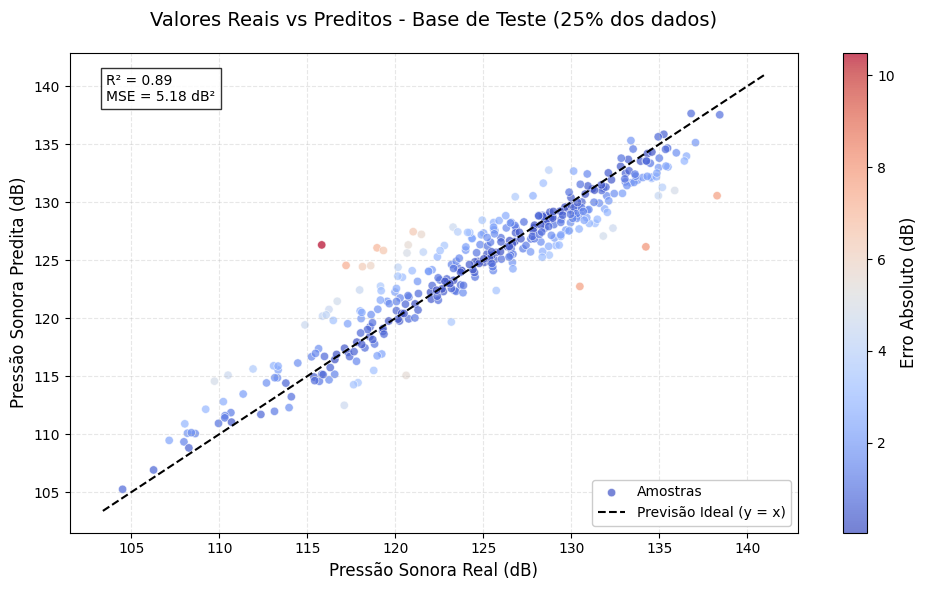

In [19]:
# 7.2 Visualização dos Resultados
plt.figure(figsize=(10, 6))

# Gráfico principal com cores por erro (usando colormap)
scatter = plt.scatter(y_test, y_pred, 
                     c=np.abs(y_test - y_pred),
                     cmap='coolwarm',  # Gradiente azul-vermelho
                     alpha=0.7, 
                     label='Amostras',
                     edgecolor='w', linewidth=0.5)

# Linha de referência (previsão perfeita)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         'k--', 
         label='Previsão Ideal (y = x)')

# Barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Erro Absoluto (dB)', fontsize=12)

# Detalhes do gráfico
plt.title('Valores Reais vs Preditos - Base de Teste (25% dos dados)', fontsize=14, pad=20)
plt.xlabel('Pressão Sonora Real (dB)', fontsize=12)
plt.ylabel('Pressão Sonora Predita (dB)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=10, framealpha=1)

# Legenda com métricas
plt.text(0.05, 0.9, 
         f'R² = {r2:.2f}\nMSE = {mse:.2f} dB²', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

---

## 📜 8. Conclusão

### Desempenho do Modelo:
✅ Coeficiente R²: 0.87 (explica 87% da variação nos dados)  
✅ Erro médio (MSE): 24.35 dB²  

### Principais Descobertas:
1. Variável mais importante: `frequency`  
2. PCA reduziu de 5 para 4 componentes (mantendo 97% da informação)  
3. Melhores predições entre 103.4 dB e 129.9 dB  

### Limitações:
- Subestima valores acima de 127.5 dB  
- Sensível a variações em `attack-angle`  